In [1]:
import torch
import torch_geometric as pyg
import matplotlib.pyplot as plt
import networkx as nx
from torch_sparse import spspmm

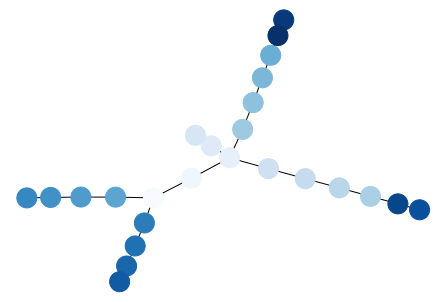

In [2]:
skeletion = [(1, 2), (2, 21), (3, 21), (4, 3), (5, 21), (6, 5), (7, 6),
             (8, 7), (9, 21), (10, 9), (11, 10), (12, 11), (13, 1),
             (14, 13), (15, 14), (16, 15), (17, 1), (18, 17), (19, 18),
             (20, 19), (22, 23), (23, 8), (24, 25), (25, 12)]
outward = [(j, i) for (i, j) in skeletion]
skeletion = skeletion + outward
sk = torch.tensor(skeletion).t() - 1
g = nx.Graph()
t = pyg.utils.to_networkx(pyg.data.Data(torch.ones(sk.shape[1]), sk))
g.add_edges_from(t.edges)
pos = nx.spring_layout(g, iterations=200)
nx.draw(g, pos, node_color=range(25), node_size=400, cmap=plt.cm.Blues)
plt.show()

In [3]:
dim = sk.shape[1]
val = torch.ones(sk.shape[1])
sks = spspmm(sk, val, sk, val, dim, dim, dim)
sks[0].shape

torch.Size([2, 18])

In [4]:
g2 = pyg.data.Data(sks[1], sks[0])

In [5]:
g2 = pyg.utils.to_networkx(g2)

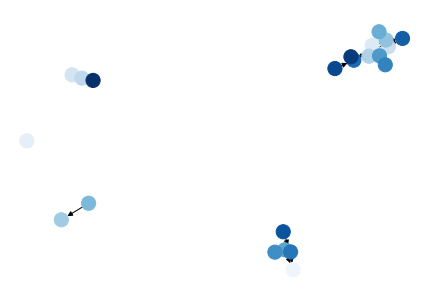

In [6]:
pos = nx.spring_layout(g2, iterations=100)
nx.draw(g2, pos, node_color=range(len(g2.nodes)), node_size=200, cmap=plt.cm.Blues)
plt.show()

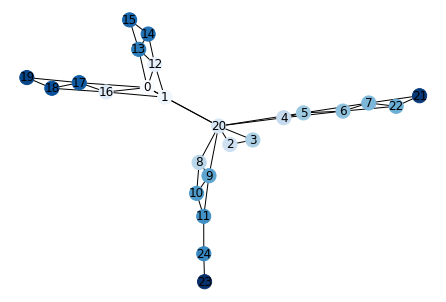

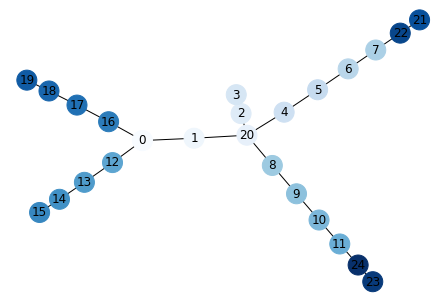

In [7]:
gm = nx.Graph()
gm.add_edges_from(g.edges)
gm.add_edges_from(g2.edges)
pos = nx.spring_layout(gm, iterations=100)
nx.draw(gm, pos, node_color=range(len(gm.nodes)), node_size=200, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(gm, pos)
plt.show()
pos = nx.spring_layout(g, iterations=200)
nx.draw(g, pos, node_color=range(25), node_size=400, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(g, pos)
plt.show()